In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
data = pd.read_csv('winequality-white.csv',sep=';')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


<Axes: xlabel='quality', ylabel='fixed acidity'>

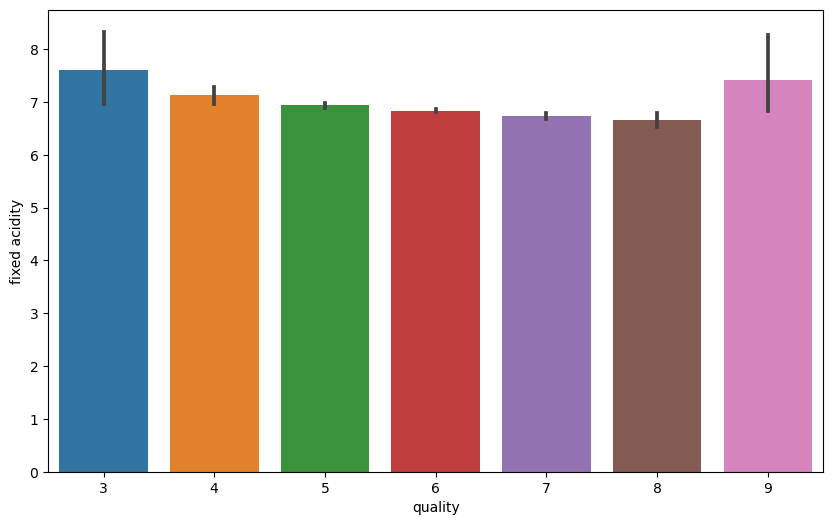

In [3]:
#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = data)

<Axes: xlabel='quality', ylabel='fixed acidity'>

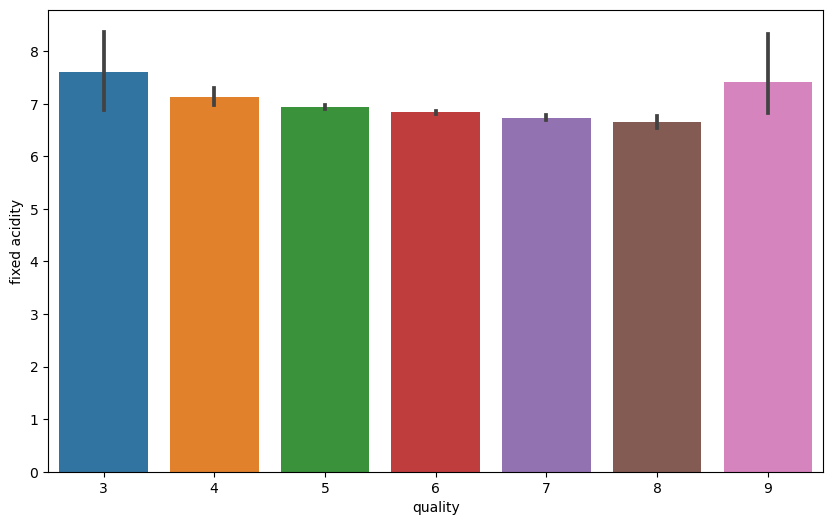

In [4]:
#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = data)

<Axes: xlabel='quality', ylabel='volatile acidity'>

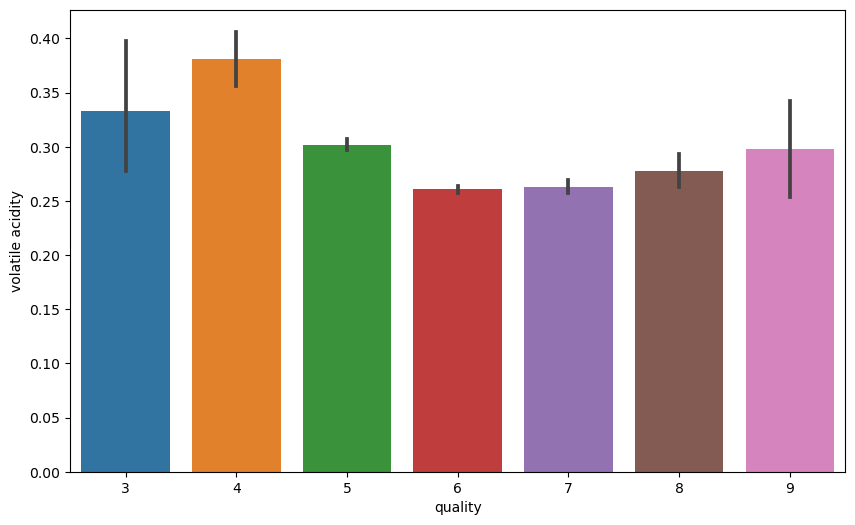

In [5]:
#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = data)

<Axes: xlabel='quality', ylabel='citric acid'>

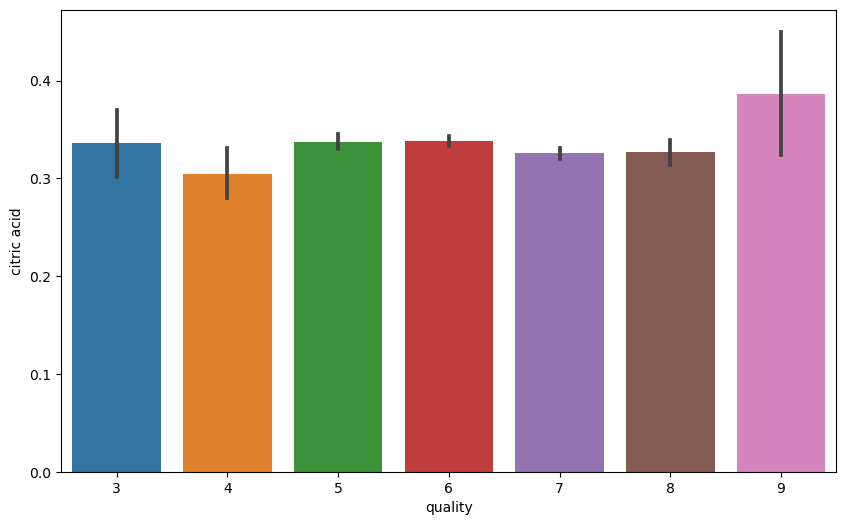

In [6]:
#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = data)

<Axes: xlabel='quality', ylabel='alcohol'>

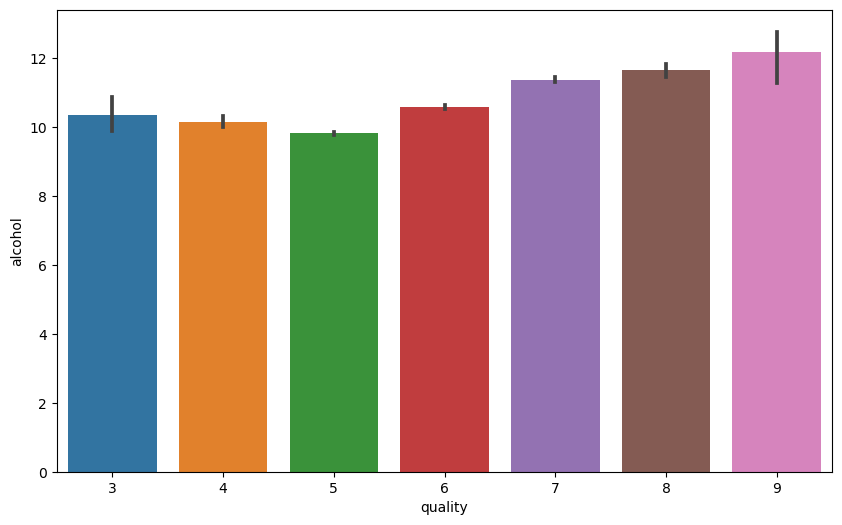

In [7]:
#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = data)

<Axes: xlabel='quality', ylabel='residual sugar'>

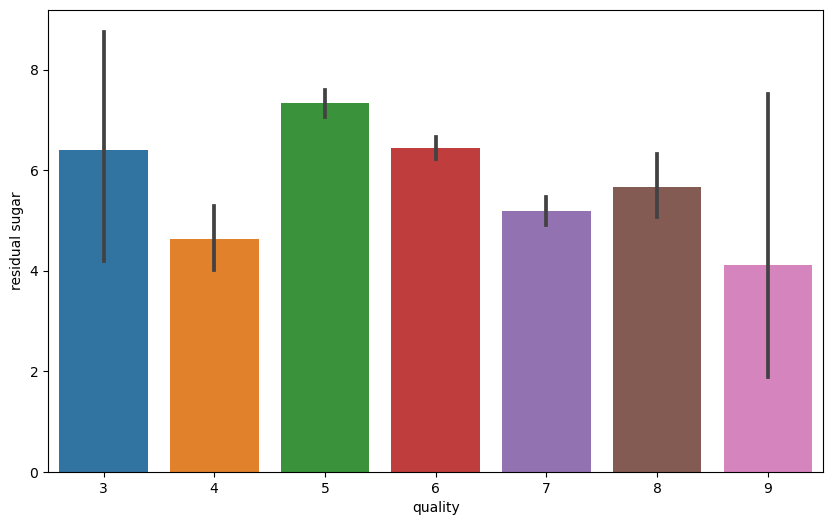

In [8]:
#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = data)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [10]:
# Sütun türünü kontrol etme ve gerekirse sayısal türe dönüştürme
data['quality'] = pd.to_numeric(data['quality'], errors='coerce')

# Sınıflandırma için sınırlar ve etiketler
bins = [1, 6.5, 10]
group_names = ['bad', 'good']

# 'quality' sütununu yeniden sınıflandırma
data['quality'] = pd.cut(data['quality'], bins=bins, labels=group_names)

# Yeni sınıfların dağılımını kontrol etme
print(data['quality'].value_counts())


quality
bad     3838
good    1060
Name: count, dtype: int64


In [11]:
label_quality = LabelEncoder()

In [12]:
data['quality'] = label_quality.fit_transform(data['quality'])
data['quality'].value_counts()

quality
0    3838
1    1060
Name: count, dtype: int64

In [13]:
X = data.drop(['quality'],axis=1)
y = data['quality']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [23]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [24]:
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [25]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       380
           1       0.85      0.64      0.73       110

    accuracy                           0.89       490
   macro avg       0.88      0.80      0.83       490
weighted avg       0.89      0.89      0.89       490



In [26]:
print(confusion_matrix(y_test, pred_rfc))

[[368  12]
 [ 40  70]]
